In [1]:
import numpy as np
import pandas as pd
import joblib

#tambahkan vectorizer tiap atribut yang telah disimpan di bawah sini
vectorizer_judul = joblib.load('../model/vectorizer_model_judul.joblib')
vectorizer_abstrak = joblib.load('../model/vectorizer_model_abstrak.joblib')
vectorizer_judul_abstrak = joblib.load('../model/vectorizer_model_judtrak.joblib')

#tambahkan model tiap atribut yang telah disimpan di bawah sini 
model_judul = joblib.load('../model/dtc-model.joblib')
model_abstrak = joblib.load('../model/dtc-model-abstrak.joblib')
model_judul_abstrak = joblib.load('../model/dtc-model-judtrak.joblib')

In [2]:
df = pd.read_csv('../../../cleaned-data-kbk.csv', index_col=0)

# Judul

In [3]:
from sklearn.model_selection import train_test_split

X_judul = df['judul_tokens']
y = df['kbk']

X_train_judul, X_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.3, random_state=42)

In [4]:
X_train_tfidf_judul = vectorizer_judul.fit_transform(X_train_judul)
X_test_tfidf_judul = vectorizer_judul.transform(X_test_judul)

X_train_tfidf_judul.shape

(884, 2337)

# Abstrak

In [5]:
from sklearn.model_selection import train_test_split

X_abstrak = df['abstrak_tokens']

X_train_abstrak, X_test_abstrak, y_train_abstrak, y_test_abstrak = train_test_split(X_abstrak, y, test_size=0.3, random_state=42)

In [6]:
X_train_tfidf_abstrak = vectorizer_abstrak.fit_transform(X_train_abstrak)
X_test_tfidf_abstrak = vectorizer_abstrak.transform(X_test_abstrak)

X_train_tfidf_abstrak.shape

(884, 8704)

# Judul dan Abstrak

In [7]:
from sklearn.model_selection import train_test_split

df['judtrak'] = [' '.join(i) for i in zip(df['judul'], df['abstrak'])]
X_judul_abstrak = df['judtrak']

X_train_judul_abstrak, X_test_judul_abstrak, y_train_judul_abstrak, y_test_judul_abstrak = train_test_split(X_judul_abstrak, y, test_size=0.3, random_state=42)

In [8]:
X_train_tfidf_judul_abstrak = vectorizer_judul_abstrak.fit_transform(X_train_judul_abstrak)
X_test_tfidf_judul_abstrak = vectorizer_judul_abstrak.transform(X_test_judul_abstrak)

X_train_tfidf_judul_abstrak.shape

(884, 12047)

# Grafik Perbandingan

In [9]:
predictions_judul = model_judul.predict(X_test_tfidf_judul)
predictions_abstrak = model_abstrak.predict(X_test_tfidf_abstrak)
predictions_judul_abstrak = model_judul_abstrak.predict(X_test_tfidf_judul_abstrak)

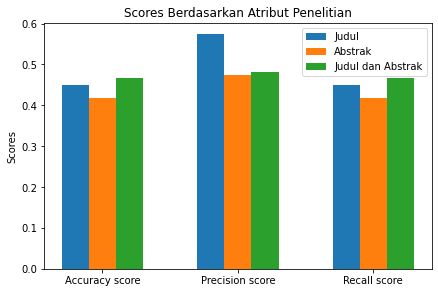

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

w=0.2
x = ["Accuracy score", "Precision score","Recall score"]
judul = [accuracy_score(y_test_judul, predictions_judul), precision_score(y_test_judul, predictions_judul, average='weighted'), recall_score(y_test_judul, predictions_judul, average='weighted')]
abstrak = [accuracy_score(y_test_abstrak, predictions_abstrak), precision_score(y_test_abstrak, predictions_abstrak, average='weighted'), recall_score(y_test_abstrak, predictions_abstrak, average='weighted')]
judul_abstrak = [accuracy_score(y_test_judul_abstrak, predictions_judul_abstrak), precision_score(y_test_judul_abstrak, predictions_judul_abstrak, average='weighted'), recall_score(y_test_judul_abstrak, predictions_judul_abstrak, average='weighted')]

fig, ax = plt.subplots()
bar1 = np.arange(len(x)) 
bar2 = [i+w for i in bar1] 
bar3 = [i+w for i in bar2]

plt.bar(bar1, judul,w,label="Judul") 
plt.bar(bar2, abstrak,w,label="Abstrak") 
plt.bar(bar3, judul_abstrak, w, label="Judul dan Abstrak")

fig.tight_layout()

ax.set_ylabel('Scores')
ax.set_title('Scores Berdasarkan Atribut Penelitian')
ax.set_xticks(bar1+w, x)
ax.legend()
plt.show()